# Credit Card Loan Applications
## Introduction and Business Problem

For the final project of Machine Learning for Business, students were tasked to identify a  problem that could be solved or assisted by using ML techniques. The selected problem and its solution must lead to or inform some tangible decision that can be made by management. Consequently, the current project focuses on credit card loan applications. Specifically, the current project aims to train a model which can determine whether applicants are likely to pay their credit card loans back on time, whether late repayments are likely to eventually lead to full repayments, and, consequently, whether to offer an applicant a credit card loan or not and at what interest rate.


## Initial Import of Dataset and Necessary Libraries  

In this first cell, the libraries necessary for the current business problem are imported along with the selected [dataset](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction). The dataset in question is split into two separate CSV files, one containing client features (property ownership, marital status, annual income, etc.), while the other contains the status of client loan repayments going back several months. The information in the second CSV file will be used as the label for the current business problem. These files are `application_record.csv` and `credit_record.csv`, respectively.  

However, since `credit_record.csv` contains data for several months for each individual client, there are several copies of each client ID number within the table. Furthermore, there are several clients on one CSV file that do not appear in the other. Consequently, a list of unique ID numbers shared across both CSV files is also created and stored in `shared_id_list`.  

Finally, the basic information for both CSV files, along with the total number of unique ID numbers shared across both CSV files, are listed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

credit_record = pd.read_csv("credit_record.csv")
app_record = pd.read_csv("application_record.csv")
shared_id_list = set(app_record["ID"]).intersection(set(credit_record["ID"]))

print(credit_record.info())
print(app_record.info())
print("Shared IDs: " + str(len(shared_id_list)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557

### Further dataset manipulation

In order to assess the business problem in question, only clients whose information appears in both CSV files can be used. Therefore, new dataframes are made from both the application data and credit record data, only containing ID numbers that appear across both CSV files.

In [2]:
# Create DataFrames with only shared IDs
shared_credit_record = credit_record[credit_record["ID"].isin(shared_id_list)]
shared_app_record = app_record[app_record["ID"].isin(shared_id_list)]
print(shared_credit_record.info())
print(shared_app_record.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 92938 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              777715 non-null  int64 
 1   MONTHS_BALANCE  777715 non-null  int64 
 2   STATUS          777715 non-null  object
dtypes: int64(2), object(1)
memory usage: 23.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 434812
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  ob

## Statistical Analyses

An intial statistical analysis of the credit record dataset is necessary in order to determine appropriate next steps. In the following two cells, the most recent loan repayment status and the most delayed loan repayment status for each client is found and frequencies are displayed in both numeric, normalized, and graphical formats.  

To improve readability, the definition for the loan repayment status symbol is available in the table below:  

| Symbol | Description |
| :---: | :---: |
| C | Loan paid off in full for the month |
| X | No loan for the month |
| 0 | Loan less than 30 days past due |
| 1 | Loan less than 60 days past due |
| 2 | Loan less than 90 days past due |
| 3 | Loan less than 120 days past due |
| 4 | Loan less than 150 days past due |
| 5 | Overdue loans or bad debts, write-offs |

C    17950
X     9669
0     8456
1      276
5       76
2       19
3        6
4        5
Name: STATUS, dtype: int64
C    0.492361
X    0.265217
0    0.231944
1    0.007571
5    0.002085
2    0.000521
3    0.000165
4    0.000137
Name: STATUS, dtype: float64


<AxesSubplot:xlabel='STATUS'>

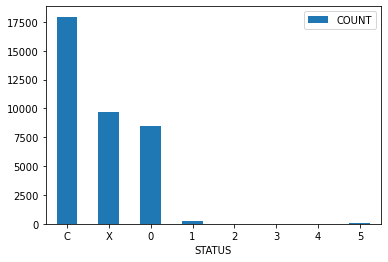

In [3]:
# Most recent loan status for IDs that appear in both tables
shared_credit_record_recent = shared_credit_record.drop_duplicates(subset="ID", ignore_index=True)
print(shared_credit_record_recent["STATUS"].value_counts())
print(shared_credit_record_recent["STATUS"].value_counts(normalize=True))
df = pd.DataFrame({"STATUS":['C', 'X', '0', '1', '2', '3', '4', '5'], "COUNT":[17950, 9669, 8456, 276, 19, 6, 5, 76]})
df.plot.bar(x="STATUS", y="COUNT", rot=0)

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64
1    329536
2    290654
0    145950
3      8747
7      1527
4       801
5       286
6       214
Name: STATUS, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      36457 non-null  object
 1   STATUS  36457 non-null  object
dtypes: object(2)
memory usage: 854.5+ KB
None
2    27711
3     3675
0     3347
1     1108
4      314
7      180
5       76
6       46
Name: STATUS, dtype: int64
2    0.760101
3    0.100804
0    0.091807
1    0.030392
4    0.008613
7    0.004937
5    0.002085
6    0.001262
Name: STATUS, dtype: float64


<AxesSubplot:xlabel='STATUS'>

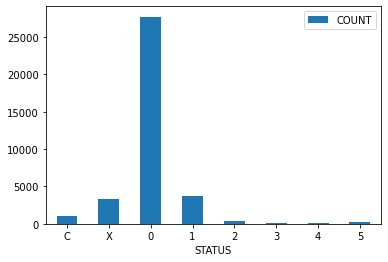

In [4]:
# Create copy of shared_credit_record
shared_credit_record_latest = shared_credit_record.copy()

# Replace objects in STATUS with ints to facilitate comparisons
sym_status = ["5", "4", "3", "2", "1", "0", "C", "X"]
val_status = [7, 6, 5, 4, 3, 2, 1, 0]

for s, v in zip(sym_status, val_status):
    shared_credit_record_latest["STATUS"] = shared_credit_record_latest["STATUS"].replace(to_replace=s, value=v)
    
# Verify replacement occured correctly
#print(shared_credit_record["STATUS"].value_counts())
#print(shared_credit_record_latest["STATUS"].value_counts())

# Find most delayed status for each unique ID
output_df = pd.DataFrame(columns=["ID", "STATUS"])

# There is likely a better way to implement what this for loop is doing, but for the purposes of this project it is sufficient 
# Maybe using the merge and groupby functions?
for ID in shared_id_list:
    delay_df = shared_credit_record_latest.loc[shared_credit_record_latest["ID"] == ID]
    most_delayed = delay_df["STATUS"].max()
    d = {"ID": [ID], "STATUS": [most_delayed]}
    output_df = pd.concat([output_df, pd.DataFrame(data=d)])

print(output_df.info())
print(output_df["STATUS"].value_counts())
print(output_df["STATUS"].value_counts(normalize=True))
df = pd.DataFrame({"STATUS":['C', 'X', '0', '1', '2', '3', '4', '5'], "COUNT":[1108, 3347, 27711, 3675, 314, 76, 46, 180]})
df.plot.bar(x="STATUS", y="COUNT", rot=0)

## Binary Classification Test-Train Split

The first step in addressing the business question is to train a binary classification model to distinguish between "good" applicants and "bad" applicants. For the purpose of the current project, good applicants were classified as individuals who had never been more than two months late on loan repayments. This cutoff point was determined based on two main factors. Initially, the cutoff for good applicants was planned to be at three months, as [consumer credit default is commonly defined as delinquency beyond a period of 90 days](https://www.sciencedirect.com/science/article/abs/pii/S0939362518302875). However, based on the distribution of the data, the two month cutoff was selected due to the small number of defaults present in the database according to the above definition.

In [5]:
# Create a copy of the most delayed repayment for each unique ID
binary_label = output_df.copy()

# Clients with maximum repayment delays of less than two months are considered good
binary_label[binary_label["STATUS"] <= 3] = 0

# Clients with maximum repayment delays of more than two months are considered bad
binary_label[binary_label["STATUS"] > 0] = 1

print(binary_label["STATUS"].value_counts())

0    35841
1      616
Name: STATUS, dtype: int64
